# 1. Exploratory Data Analysis

In [1]:
# Import libraries

# Utilities
import pandas as pd
pd.options.display.max_colwidth = 300
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# SKlearn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
# load the data
df = pd.read_csv("CC_general.csv")

In [3]:
# Viewing the top 5 rows
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Display shape of data frame
df.shape

(8950, 18)

# 2. Data Cleaning/Preparation

In [5]:
# Check if there are NaN values
X = df
X.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# Fill NaN values with mean

X['MINIMUM_PAYMENTS'] = X['MINIMUM_PAYMENTS'].fillna(X['MINIMUM_PAYMENTS'].mean())
X['CREDIT_LIMIT'] = X['CREDIT_LIMIT'].fillna(X['CREDIT_LIMIT'].mean())

In [7]:
# Drop duplicates & show summary values

X = X.drop_duplicates()
X = X.drop('CUST_ID', axis=1)
print(X.shape)
X.describe()

(8950, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<AxesSubplot:>

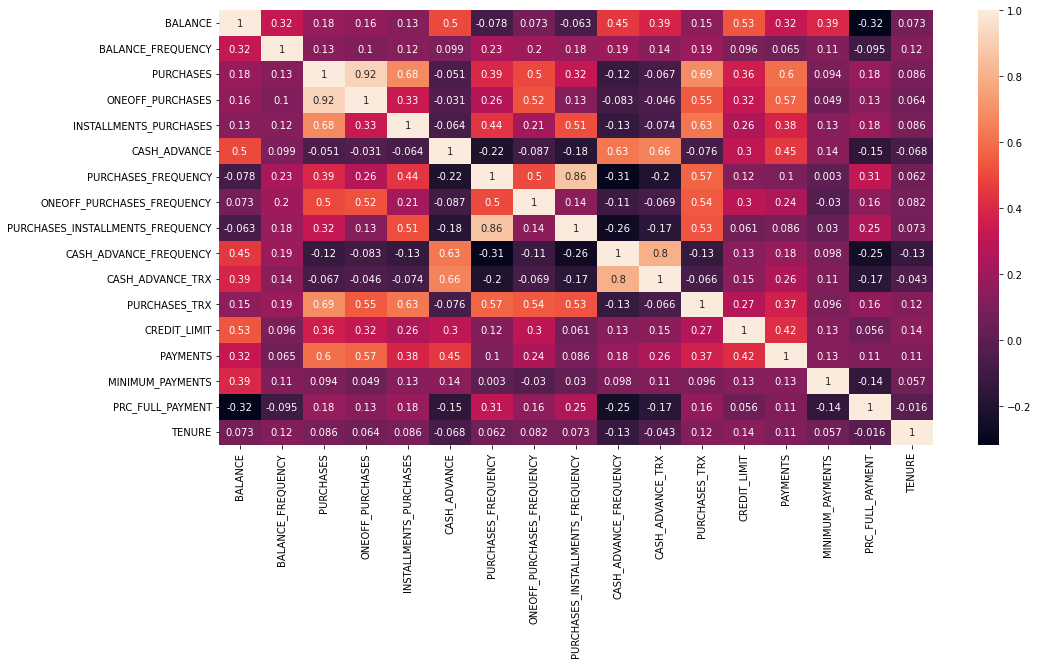

In [8]:
# Heat-map

plt.figure(figsize=(16, 8))
sns.heatmap(X.corr(), annot=True)

# 3. (K-Clustering) Model Training

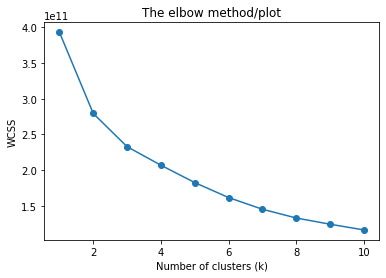

In [9]:
# Elbow method to find optimal K clusters

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss, marker = 'o')
plt.title('The elbow method/plot')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

# 3 is where the slope eases, thus to use 3 clusters

In [10]:
# Normalize data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


In [11]:
# Traning the model

kmeans = KMeans(n_clusters= 3)
kmeans_model = kmeans.fit(X_scaled) # Training the model on input data
labels=kmeans_model.labels_
labels

array([1, 2, 1, ..., 1, 1, 1])

# 4. (K Clustering) Model Visualisation

In [12]:
dist = 1 - cosine_similarity(X_scaled)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

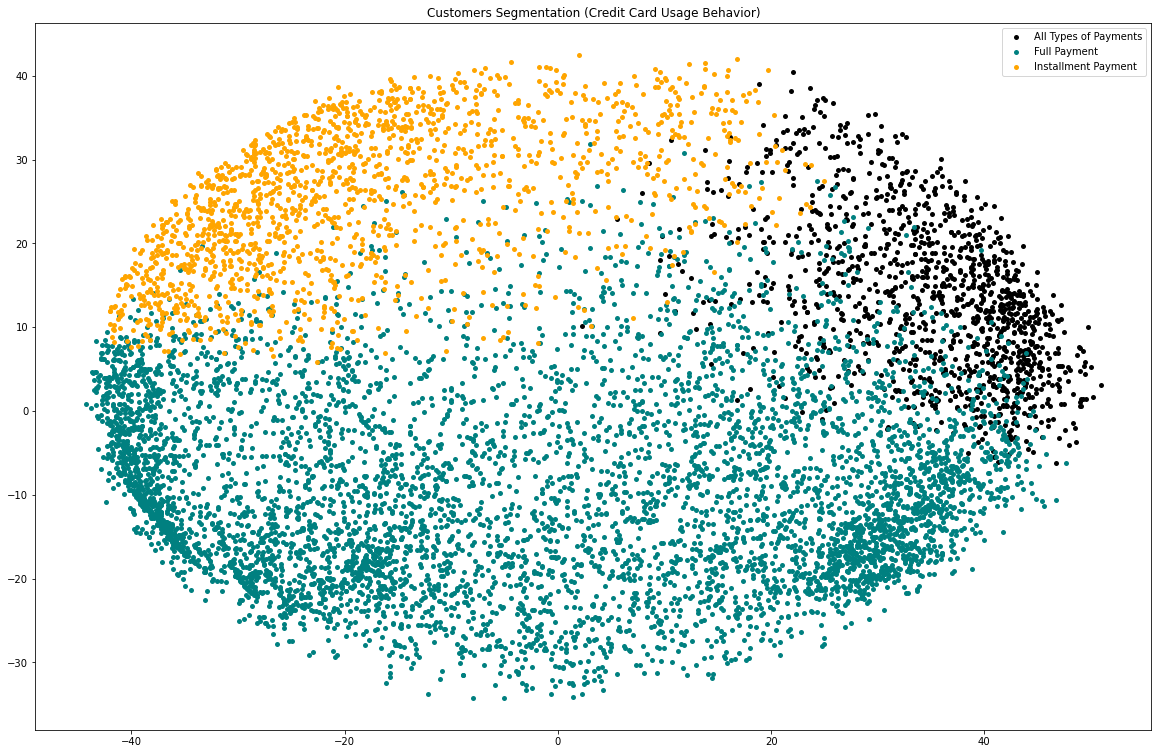

In [13]:
# Plotting the K Clustering

x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'black',
          1: 'teal',
          2: 'orange', 
          }

names = {0: 'All Types of Payments', 
         1: 'Full Payment', 
         2: 'Installment Payment', 
         }
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')

ax.legend()
ax.set_title("Customers Segmentation (Credit Card Usage Behavior)")
plt.show()

# 5. (Hierachical) Model Training

In [14]:
Y = X_scaled.iloc[:, [7,8]].values

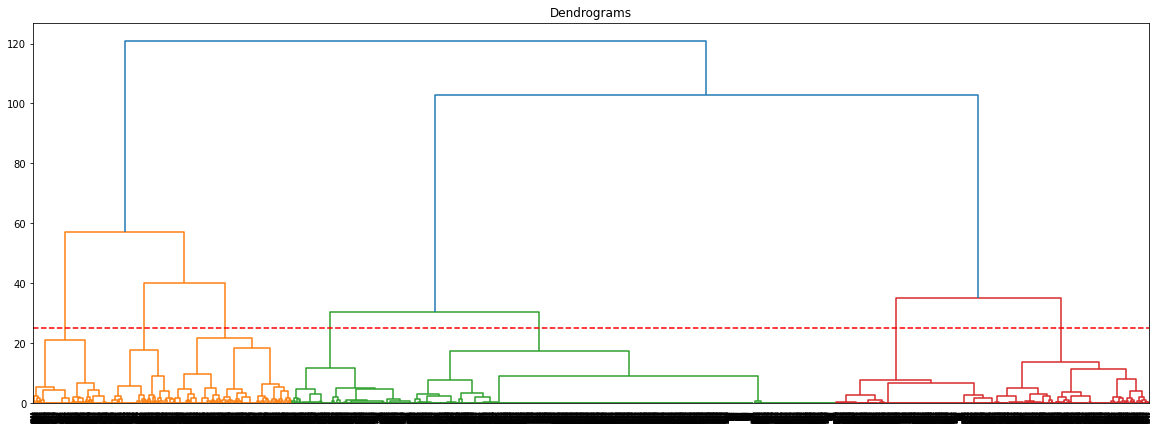

In [15]:
# make a dendrogram using ward method to find optimal clusters (Loading takes awhile)
plt.figure(figsize=(20, 7)) 
plt.title("Dendrograms") 

dendrogram = sch.dendrogram(sch.linkage(Y, method = 'ward'))
plt.axhline(y= 25, color='r', linestyle='--')

plt.show()

# 7 main clusters identified

In [16]:
# Model Training

hc= AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')

In [17]:
# Fitting and prediction

y_hc = hc.fit_predict(Y)
y_hc

array([3, 3, 1, ..., 2, 3, 1], dtype=int64)

# 6. (Hierachical) Visualisation

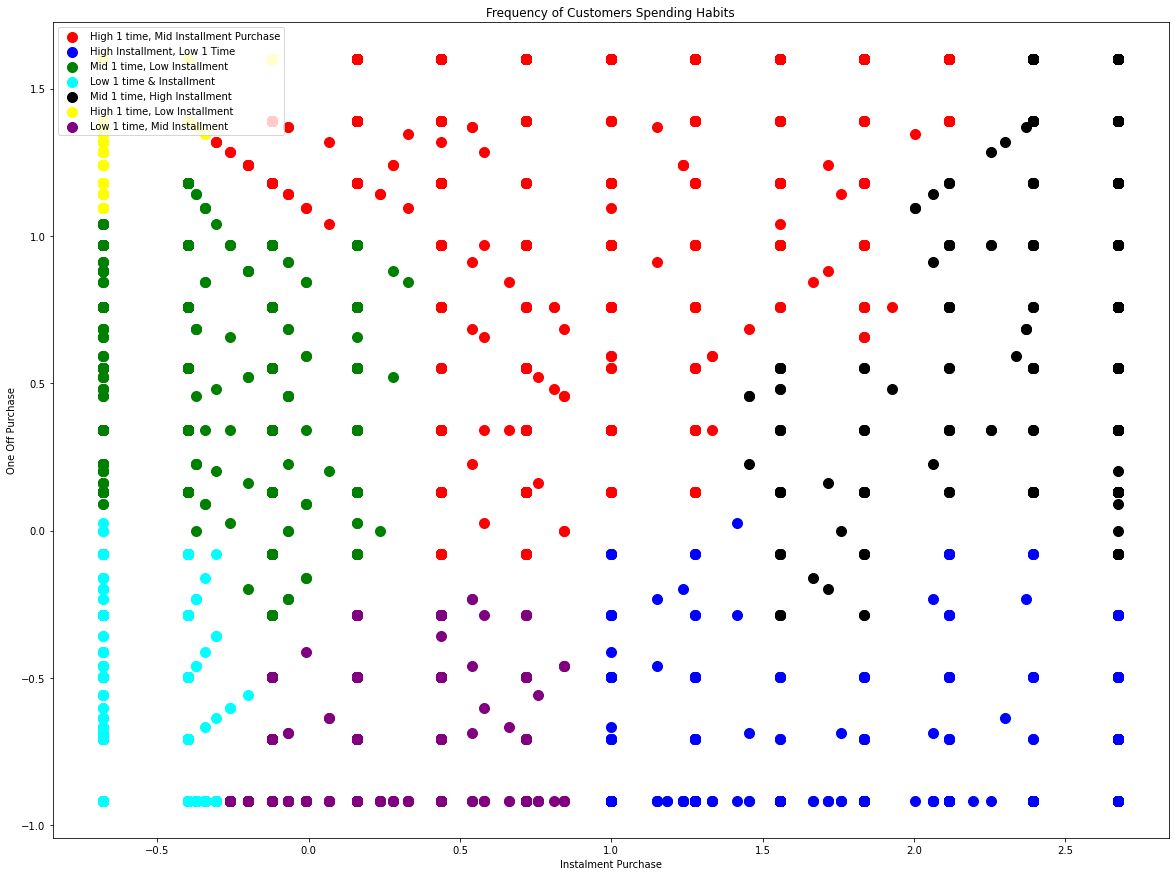

In [18]:
# Visualize the model

plt.figure(figsize=(20, 15))
plt.scatter(Y[y_hc == 0, 0], Y[y_hc == 0, 1], s=100, c='red', label = 'High 1 time, Mid Installment Purchase')
plt.scatter(Y[y_hc == 1, 0], Y[y_hc == 1, 1], s=100, c='blue', label = 'High Installment, Low 1 Time')
plt.scatter(Y[y_hc == 2, 0], Y[y_hc == 2, 1], s=100, c='green', label = 'Mid 1 time, Low Installment')
plt.scatter(Y[y_hc == 3, 0], Y[y_hc == 3, 1], s=100, c='cyan', label = 'Low 1 time & Installment')
plt.scatter(Y[y_hc == 4, 0], Y[y_hc == 4, 1], s=100, c='black', label = 'Mid 1 time, High Installment')
plt.scatter(Y[y_hc == 5, 0], Y[y_hc == 5, 1], s=100, c='yellow', label = 'High 1 time, Low Installment')
plt.scatter(Y[y_hc == 6, 0], Y[y_hc == 6, 1], s=100, c='purple', label = 'Low 1 time, Mid Installment')
plt.title('Frequency of Customers Spending Habits')
plt.xlabel('Instalment Purchase')
plt.ylabel('One Off Purchase')
plt.legend(loc= 'upper left')
plt.show()

#### Conclusion

In conclusion, both models have revealed that majority of this dataset's customers make full payments as compared to installment purchases.

Depending on the bank's marketing strategy, it may be useful to come up with more aggressive campaigns targetting customers who make full payments, such as increased cash back %, removing any form of rebates for installment purchases and/or introducing administrative and surcharges.